# 12wk-2: 순환신경망 (7)

최규빈  
2022-11-22

> 순환신경망 minor topics (1)

# 강의영상

> <https://youtube.com/playlist?list=PLQqh36zP38-zzFVZVXR27PzztD_yCYqyJ>

# imports

In [1]:
import torch
import pandas as pd

In [2]:
import matplotlib.pyplot as plt 

# Define some funtions

In [3]:
def f(txt,mapping):
    return [mapping[key] for key in txt] 
sig = torch.nn.Sigmoid()
soft = torch.nn.Softmax(dim=1)
tanh = torch.nn.Tanh()

# 순환신경망 표현력 비교실험 (1)

## data: abcabC

In [4]:
txt = list('abcabC')*100
txt[:8]
txt_x = txt[:-1] 
txt_y = txt[1:]

In [5]:
mapping = {'a':0,'b':1,'c':2,'C':3} 
x= torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float()
y= torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float()

In [6]:
x = x.to("cuda:0")
y = y.to("cuda:0") 

In [7]:
x.shape

## 실험

`-` 실험1

In [8]:
HIDDEN = 3

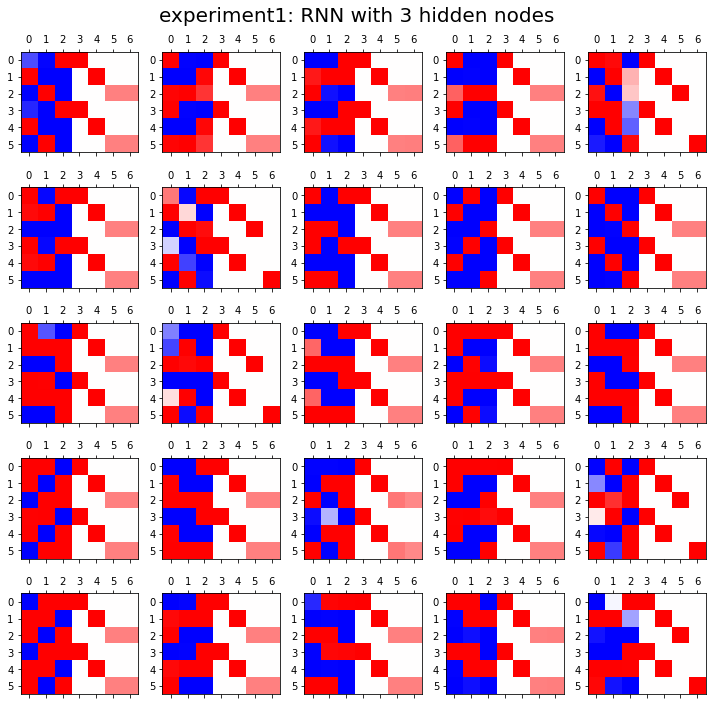

In [9]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        rnn = torch.nn.RNN(4,HIDDEN).to("cuda:0")
        linr = torch.nn.Linear(HIDDEN,4).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,HIDDEN).to("cuda:0")
        for epoc in range(500):
            ## 1
            hidden, hT = rnn(x,_water)
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combind = torch.concat([hidden,yhat],axis=1)
        ax[i][j].matshow(combind.to("cpu").data[-6:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle("experiment1: RNN with {} hidden nodes".format(HIDDEN),size=20)
fig.tight_layout()

`-` 실험2

In [10]:
HIDDEN = 4

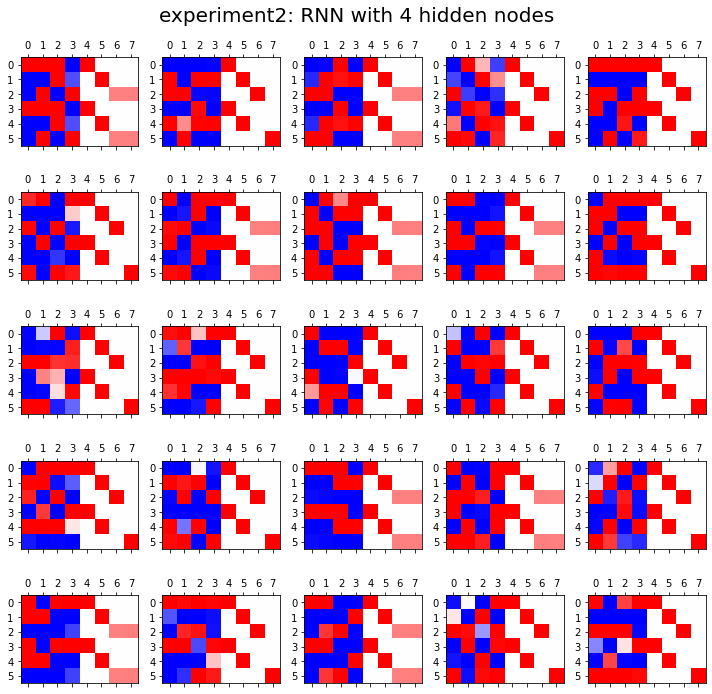

In [11]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        rnn = torch.nn.RNN(4,HIDDEN).to("cuda:0")
        linr = torch.nn.Linear(HIDDEN,4).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,HIDDEN).to("cuda:0")
        for epoc in range(500):
            ## 1
            hidden, hT = rnn(x,_water)
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combind = torch.concat([hidden,yhat],axis=1)
        ax[i][j].matshow(combind.to("cpu").data[-6:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle("experiment2: RNN with {} hidden nodes".format(HIDDEN),size=20)
fig.tight_layout()

`-` 실험3

In [12]:
HIDDEN = 8

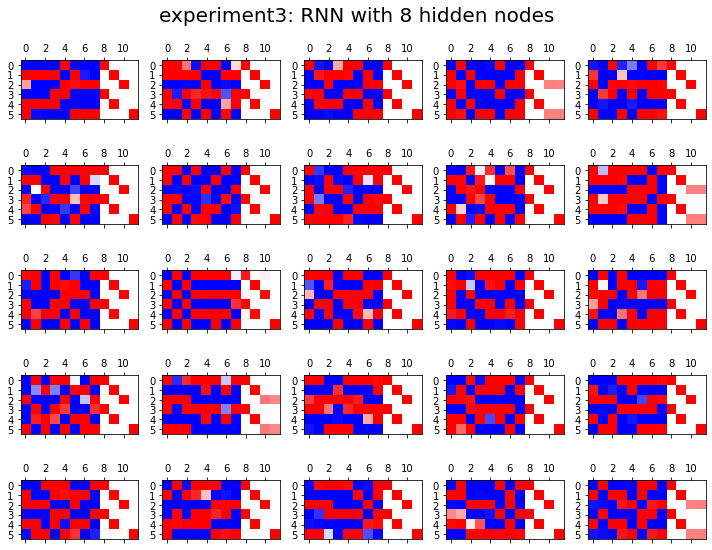

In [13]:
fig, ax = plt.subplots(5,5,figsize=(10,8))
for i in range(5):
    for j in range(5):
        rnn = torch.nn.RNN(4,HIDDEN).to("cuda:0")
        linr = torch.nn.Linear(HIDDEN,4).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,HIDDEN).to("cuda:0")
        for epoc in range(500):
            ## 1
            hidden, hT = rnn(x,_water)
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combind = torch.concat([hidden,yhat],axis=1)
        ax[i][j].matshow(combind.to("cpu").data[-6:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle("experiment3: RNN with {} hidden nodes".format(HIDDEN),size=20)
fig.tight_layout()

## 결론

`-` 노드수가 많으면 학습에 유리함

# 순환신경망 표현력 비교실험 (2)

## data: ab(c,C)

In [14]:
# torch.manual_seed(43052)
# txta = 'a'*50
# txtb = 'b'*50
# prob_upper = torch.bernoulli(torch.zeros(50)+0.5) 
# txtc = list(map(lambda x: 'c' if x==1 else 'C', prob_upper))
# txt = ''.join([txta[i]+','+txtb[i]+','+txtc[i]+',' for i in range(50)]).split(',')[:-1]
# txt_x = txt[:-1] 
# txt_y = txt[1:]
# pd.DataFrame({'txt_x':txt_x,'txt_y':txt_y}).to_csv("2022-11-25-ab(c,C).csv",index=False)

In [15]:
df= pd.read_csv("https://raw.githubusercontent.com/guebin/DL2022/main/posts/IV.%20RNN/2022-11-25-ab(c%2CC).csv")
df

In [16]:
mapping = {'a':0,'b':1,'c':2,'C':3} 
x= torch.nn.functional.one_hot(torch.tensor(f(df.txt_x,mapping))).float()
y= torch.nn.functional.one_hot(torch.tensor(f(df.txt_y,mapping))).float()

In [17]:
x = x.to("cuda:0")
y = y.to("cuda:0") 

## 실험

`-` 실험1

In [18]:
HIDDEN = 3

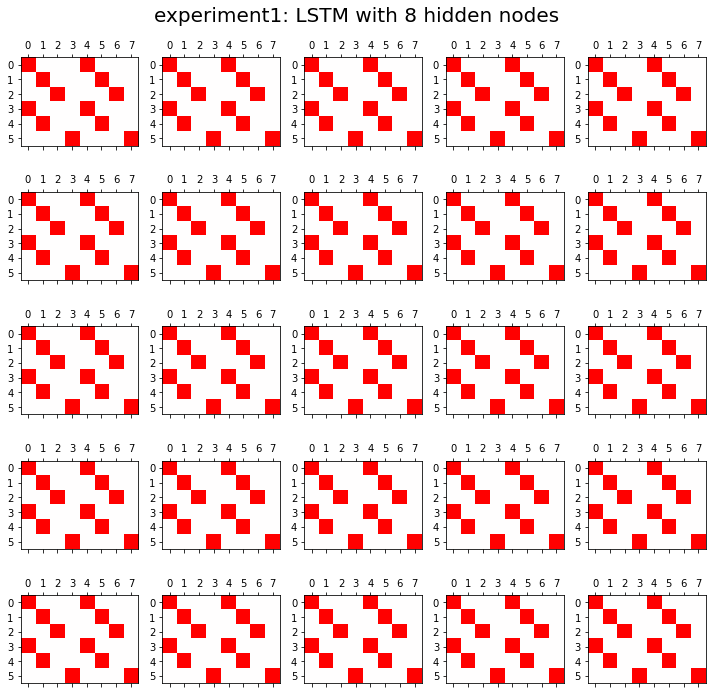

In [14]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        lstm = torch.nn.LSTM(4,HIDDEN).to("cuda:0")
        linr = torch.nn.Linear(HIDDEN,4).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,HIDDEN).to("cuda:0")
        for epoc in range(500):
            ## 1
            hidden, (hT,cT) = lstm(x,(_water,_water))
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combinded = torch.concat([yhat,y],axis=1)
        ax[i][j].matshow(combinded.to("cpu").data[-6:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle("experiment1: LSTM with {} hidden nodes".format(HIDDEN),size=20)
fig.tight_layout()

`-` 실험2

In [15]:
HIDDEN = 16

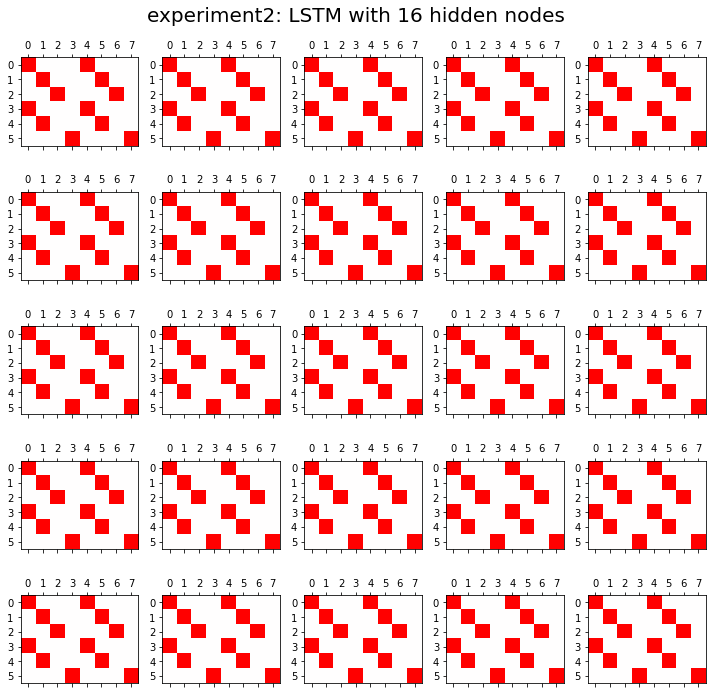

In [16]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        lstm = torch.nn.LSTM(4,HIDDEN).to("cuda:0")
        linr = torch.nn.Linear(HIDDEN,4).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,HIDDEN).to("cuda:0")
        for epoc in range(500):
            ## 1
            hidden, (hT,cT) = lstm(x,(_water,_water))
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combinded = torch.concat([yhat,y],axis=1)
        ax[i][j].matshow(combinded.to("cpu").data[-6:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle("experiment2: LSTM with {} hidden nodes".format(HIDDEN),size=20)
fig.tight_layout()

## 결론

`-` 노드수가 너무 많으면 오버피팅 경향도 있음

# 문자열에서 단어로

## data: human numbers 5

In [17]:
txt = (['one',',','two',',','three',',','four',',','five',',']*100)[:-1]

In [18]:
mapping = {',': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5}

In [19]:
txt_x = txt[:-1] 
txt_y = txt[1:]

In [20]:
x= torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float()
y= torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float()

In [21]:
x = x.to("cuda:0")
y = y.to("cuda:0") 

## torch를 이용한 learn

In [31]:
HIDDEN = 20

In [32]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(6,HIDDEN).to("cuda:0")
linr = torch.nn.Linear(HIDDEN,6).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)
_water = torch.zeros(1,HIDDEN).to("cuda:0")
for epoc in range(50):
    ## 1
    hidden, (hT,cT) = lstm(x,(_water,_water))
    output = linr(hidden)
    ## 2
    loss = loss_fn(output,y)
    ## 3
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [33]:
soft(output).data[-10:].to("cpu")

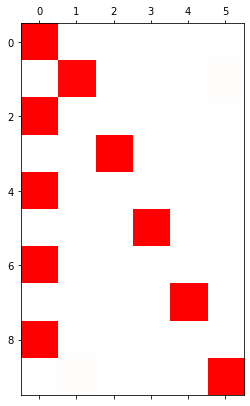

In [35]:
plt.matshow(soft(output).data[-10:].to("cpu"),cmap='bwr',vmin=-1,vmax=1)

## fastai를 이용한 learn

In [36]:
from fastai.text.all import *

In [37]:
ds1 = torch.utils.data.TensorDataset(x,y)
ds2 = torch.utils.data.TensorDataset(x,y) # dummy 
dl1 = torch.utils.data.DataLoader(ds1,batch_size=998) 
dl2 = torch.utils.data.DataLoader(ds2,batch_size=998) # dummy
dls = DataLoaders(dl1,dl2) 

In [38]:
class MyLSTM(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = torch.nn.LSTM(6,HIDDEN)
        self.linr = torch.nn.Linear(HIDDEN,6)
    def forward(self,x):
        _water = torch.zeros(1,HIDDEN).to("cuda:0")
        hidden, (hT,cT)  = self.lstm(x,(_water,_water))
        output = self.linr(hidden) 
        return output

In [39]:
net = MyLSTM()
loss_fn = torch.nn.CrossEntropyLoss()

In [40]:
lrnr = Learner(dls,net,loss_fn,lr=0.1)

In [41]:
lrnr.fit(50)

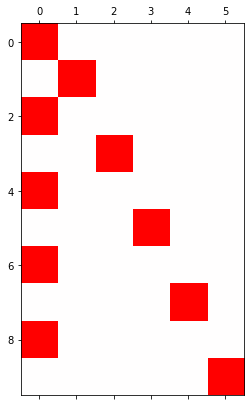

In [42]:
plt.matshow(soft(lrnr.model(x)).data.to("cpu")[-10:],cmap='bwr',vmin=-1,vmax=1)

# 숙제

없음